Assignment 1.1: NLP Preprocessing: News Classification

Mostafa Zamaniturk

Instructions
For this assignment, you will use the indicated dataset and implement the tasks described below in your Jupyter Notebook or Python script. You will submit your notebook or script as a PDF (preferred) or HTML document. 

Required Dataset
BBC News Classification Dataset (Kaggle) or sklearn.datasets.fetch_20newsgroups

5 categories: Business, Entertainment, Politics, Sport, Tech
~2,225 news articles

Required Details

Part 1: Data Exploration

- Load the dataset and show basic statistics

- Visualize article distribution by category

- Display sample articles from each category


In [1]:
! pip install pandas matplotlib

Dataset Shape: (1490, 3)

Columns: ['ArticleId', 'Text', 'Category']

Category Counts:
 Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None

Basic Statistics (text length):
count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: text_length, dtype: float64


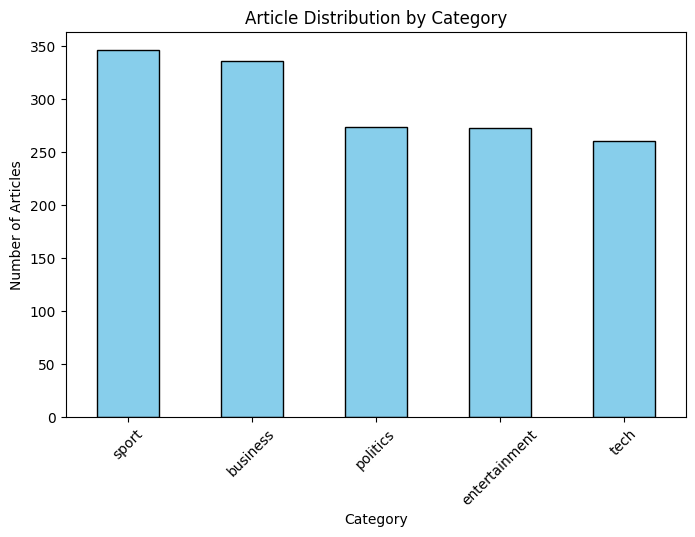

Category: business
Sample text:

nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the ...
Category: tech
Sample text:

reboot ordered for eu patent law a european parliament committee has ordered a rewrite of the proposals for controversial new european union rules which govern computer-based inventions.  the legal affairs committee (juri) said the commission should re-submit the computer implemented inventions directive after meps failed to back it. it has had vocal critics who say it could favour large over small firms and impact open-source so

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "BBC News Train.csv"
df = pd.read_csv(file_path)

# Show basic dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nCategory Counts:\n", df['Category'].value_counts())

# Quick statistics
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics (text length):")
df['text_length'] = df['Text'].apply(len)
print(df['text_length'].describe())

# Visualize article distribution by category
plt.figure(figsize=(8,5))
df['Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Article Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

# Display sample articles from each category
for category in df['Category'].unique():
    print("="*80)
    print(f"Category: {category}")
    sample = df[df['Category'] == category].sample(1, random_state=42)  # pick one sample
    print("Sample text:\n")
    print(sample['Text'].values[0][:500], "...")  # first 500 chars


Part 2: Text Preprocessing 
- Create and compare 2 preprocessing pipelines:
    - Basic: tokenization + lowercasing + stop word removal
    - Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.


Basic: tokenization + lowercasing + stop word removal

In [9]:
! pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]3/4 [nltk]


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# define a function to do all tokenization, Lowercasing and removing stopwords:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove stopwords and keep only alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return filtered_tokens

# Apply above function to the Text column
df['processed_text'] = df['Text'].apply(preprocess_text)

# Show the original text
print(df['Text'].head())

# Show first 5 processed samples
print(df[['Category', 'processed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object
   Category                                     processed_text
0  business  [worldcom, launches, defence, lawyers, defendi...
1  business  [german, business, confidence, slides, german,...
2  business  [bbc, poll, indicates, economic, gloom, citize...
3      tech  [lifestyle, governs, mobile, choice, faster, b...
4  business  [enron, bosses, payout, eighteen, former, enro...


Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Download resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Helper: map POS tags to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun


# define a function to do all tokenization, Lowercasing and removing stopwords as basic
# and stemming, lemmatization and POS tags:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove stopwords and keep only alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # POS tagging
    pos_tags = pos_tag(filtered_tokens)

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization (with POS awareness)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return {
        "original": text,
        "filtered": filtered_tokens,
        "stemmed": stemmed_tokens,
        "lemmatized": lemmatized_tokens,
        "pos_tags": pos_tags
    }

# Apply above function to the Text column
df['processed'] = df['Text'].apply(preprocess_text)

# Show comparison for one row
sample = df['processed'].iloc[0]
print("🔹 Original:\n", sample['original'][:300], "...\n")
print("🔹 Filtered:\n", sample['filtered'][:20], "\n")
print("🔹 Stemmed:\n", sample['stemmed'][:20], "\n")
print("🔹 Lemmatized:\n", sample['lemmatized'][:20], "\n")
print("🔹 POS Tags:\n", sample['pos_tags'][:20])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔹 Original:
 worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at th ...

🔹 Filtered:
 ['worldcom', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charges', 'called', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper'] 

🔹 Stemmed:
 ['worldcom', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper'] 

🔹 Lemmatized:
 ['worldcom', 'launch', 'defence', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charge', 'call', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper'] 



Part 3: Text Vectorization 
- Implement and compare:
    - Bag of Words (CountVectorizer)
    - TF-IDF (TfidfVectorizer)
    - Word2Vec (both CBoW and Skip-gram, average word vectors for documents). Create visualizations comparing the methods.


Part 4: Classification 
- For each vectorization method, train:
    - Logistic Regression
    - Simple LSTM
    
Report accuracy, precision, recall, and F1-score for each combination.